In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [80]:
data = pd.read_csv('data.csv', parse_dates=[0])
train, test = train_test_split(data, test_size=0.3) #разбиваем на обучающую и тестовую выборку

real_features = ['meanWidth', 'meanHeight', 'meanLength', 'meanVolume',
                 'countStacking', 'countTurnover', 'boxesCount',
                 'loadingWidth', 'loadingWidth', 'loadingLength']  # вещественные признаки
target_feature = 'density_percent'  # целевой признак

In [81]:
model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(train[real_features], train[target_feature])  # обучаем

LinearRegression()

In [82]:
print('Оценки коэффициентов перед признаками:\n', model.coef_)

print('\nОценка свободного коэффициента:\n', model.intercept_)

test_preds = model.predict(test[real_features])

print('\nMSE =', round(np.sqrt(((test[target_feature] - test_preds) ** 2).mean()), 2))

def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()
print('MAPE =', round(mean_absolute_percentage_error(test[target_feature], test_preds), 2))
model.score(test[real_features], test[target_feature])

Оценки коэффициентов перед признаками:
 [ 3.20478904e-03  1.09333724e-02  2.59935311e-03 -2.97176394e-10
  7.94015849e-02  5.91184048e-03 -6.84611691e-02 -9.60786897e-03
 -9.60786897e-03  8.57095800e-04]

Оценка свободного коэффициента:
 91.7669084732538

MSE = 16.83
MAPE = 21.05


0.05766714689944075

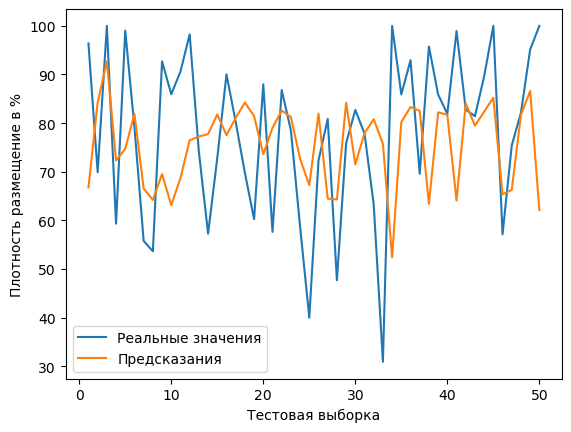

In [83]:
plt.plot(list(range(1, 51)), test[target_feature][:50],  label="Реальные значения")
plt.plot(list(range(1, 51)), test_preds[:50], label="Предсказания")
plt.legend(loc="lower left")
plt.ylabel("Плотность размещение в %")
plt.xlabel("Тестовая выборка")
plt.show()

In [84]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(fit_intercept=True, max_iter = 10000)  # объявляем модель
model_lasso.fit(train[real_features], train[target_feature])  # обучаем
model_lasso.score(test[real_features], test[target_feature])

0.05759668953542474

In [85]:
test_preds_lasso = model_lasso.predict(test[real_features])
print('MAPE =', round(mean_absolute_percentage_error(test[target_feature], test_preds_lasso), 2))

MAPE = 21.05


In [86]:
from sklearn.linear_model import BayesianRidge
Bayesian_model = BayesianRidge()
Bayesian_model.fit(train[real_features], train[target_feature])
Bayesian_model.score(test[real_features], test[target_feature])

0.05153706032659422

In [87]:
test_preds_Bayesian = Bayesian_model.predict(test[real_features])
print('\nMSE =', round(np.sqrt(((test[target_feature] - test_preds_Bayesian) ** 2).mean()), 2))
print('MAPE =', round(mean_absolute_percentage_error(test[target_feature], test_preds_Bayesian), 2))


MSE = 16.88
MAPE = 21.11


In [10]:
data.isnull().sum().sort_values(ascending=False)/data.shape[0]


width_statistics_1           0.0
mostWithSameheightPercent    0.0
meanMass                     0.0
loadingLength                0.0
loadingHeight                0.0
loadingWidth                 0.0
boxesCount                   0.0
countTurnover                0.0
countStacking                0.0
rotationNotZeroCount         0.0
meanVolume                   0.0
meanLength                   0.0
meanHeight                   0.0
meanWidth                    0.0
mostWithSameLengthPercent    0.0
mostWithSameWidthPercent     0.0
width_statistics_2           0.0
length_statistics_5          0.0
length_statistics_4          0.0
length_statistics_3          0.0
length_statistics_2          0.0
length_statistics_1          0.0
height_statistics_5          0.0
height_statistics_4          0.0
height_statistics_3          0.0
height_statistics_2          0.0
height_statistics_1          0.0
width_statistics_5           0.0
width_statistics_4           0.0
width_statistics_3           0.0
density_pe

Давайте увеличим входные данные и посмотрим насколько это улучшит качество модели

width_statistics_1 - width_statistics_5 это квантили, которые разбивают данные (в этом случае о ширине коробок) на 4 равные по вероятности кусочки. Аналогично для height_statistics и length_statistics.

In [88]:
new_features = ['width_statistics_1', 'width_statistics_2', 'width_statistics_3','width_statistics_4', 'width_statistics_5',
           'height_statistics_1', 'height_statistics_2', 'height_statistics_3','height_statistics_4', 'height_statistics_5',
           'length_statistics_1', 'length_statistics_2', 'length_statistics_3','length_statistics_4','length_statistics_5',
           'mostWithSameWidthPercent', 'mostWithSameheightPercent', 'mostWithSameLengthPercent',
           'meanWidth','meanHeight','meanLength','meanVolume',
           'rotationNotZeroCount', 'countStacking', 'countTurnover', 'boxesCount', 
           'loadingWidth', 'loadingHeight', 'loadingLength','meanMass']

In [90]:
new_model = LinearRegression(fit_intercept=True)  # объявляем модель
new_model.fit(train[new_features], train[target_feature])  # обучаем
new_model.score(test[new_features], test[target_feature])

0.4272641759877398

In [92]:
print('Оценки коэффициентов перед признаками:\n', model.coef_)

print('\nОценка свободного коэффициента:\n', model.intercept_)

new_test_preds = new_model.predict(test[new_features])

print('\nMSE =', round(np.sqrt(((test[target_feature] - new_test_preds) ** 2).mean()), 2))
print('MAPE =', round(mean_absolute_percentage_error(test[target_feature], new_test_preds), 2))

Оценки коэффициентов перед признаками:
 [ 3.20478904e-03  1.09333724e-02  2.59935311e-03 -2.97176394e-10
  7.94015849e-02  5.91184048e-03 -6.84611691e-02 -9.60786897e-03
 -9.60786897e-03  8.57095800e-04]

Оценка свободного коэффициента:
 91.7669084732538

MSE = 13.12
MAPE = 15.35


Давайте посмотрим как эти характеристики взаимосвязаны.

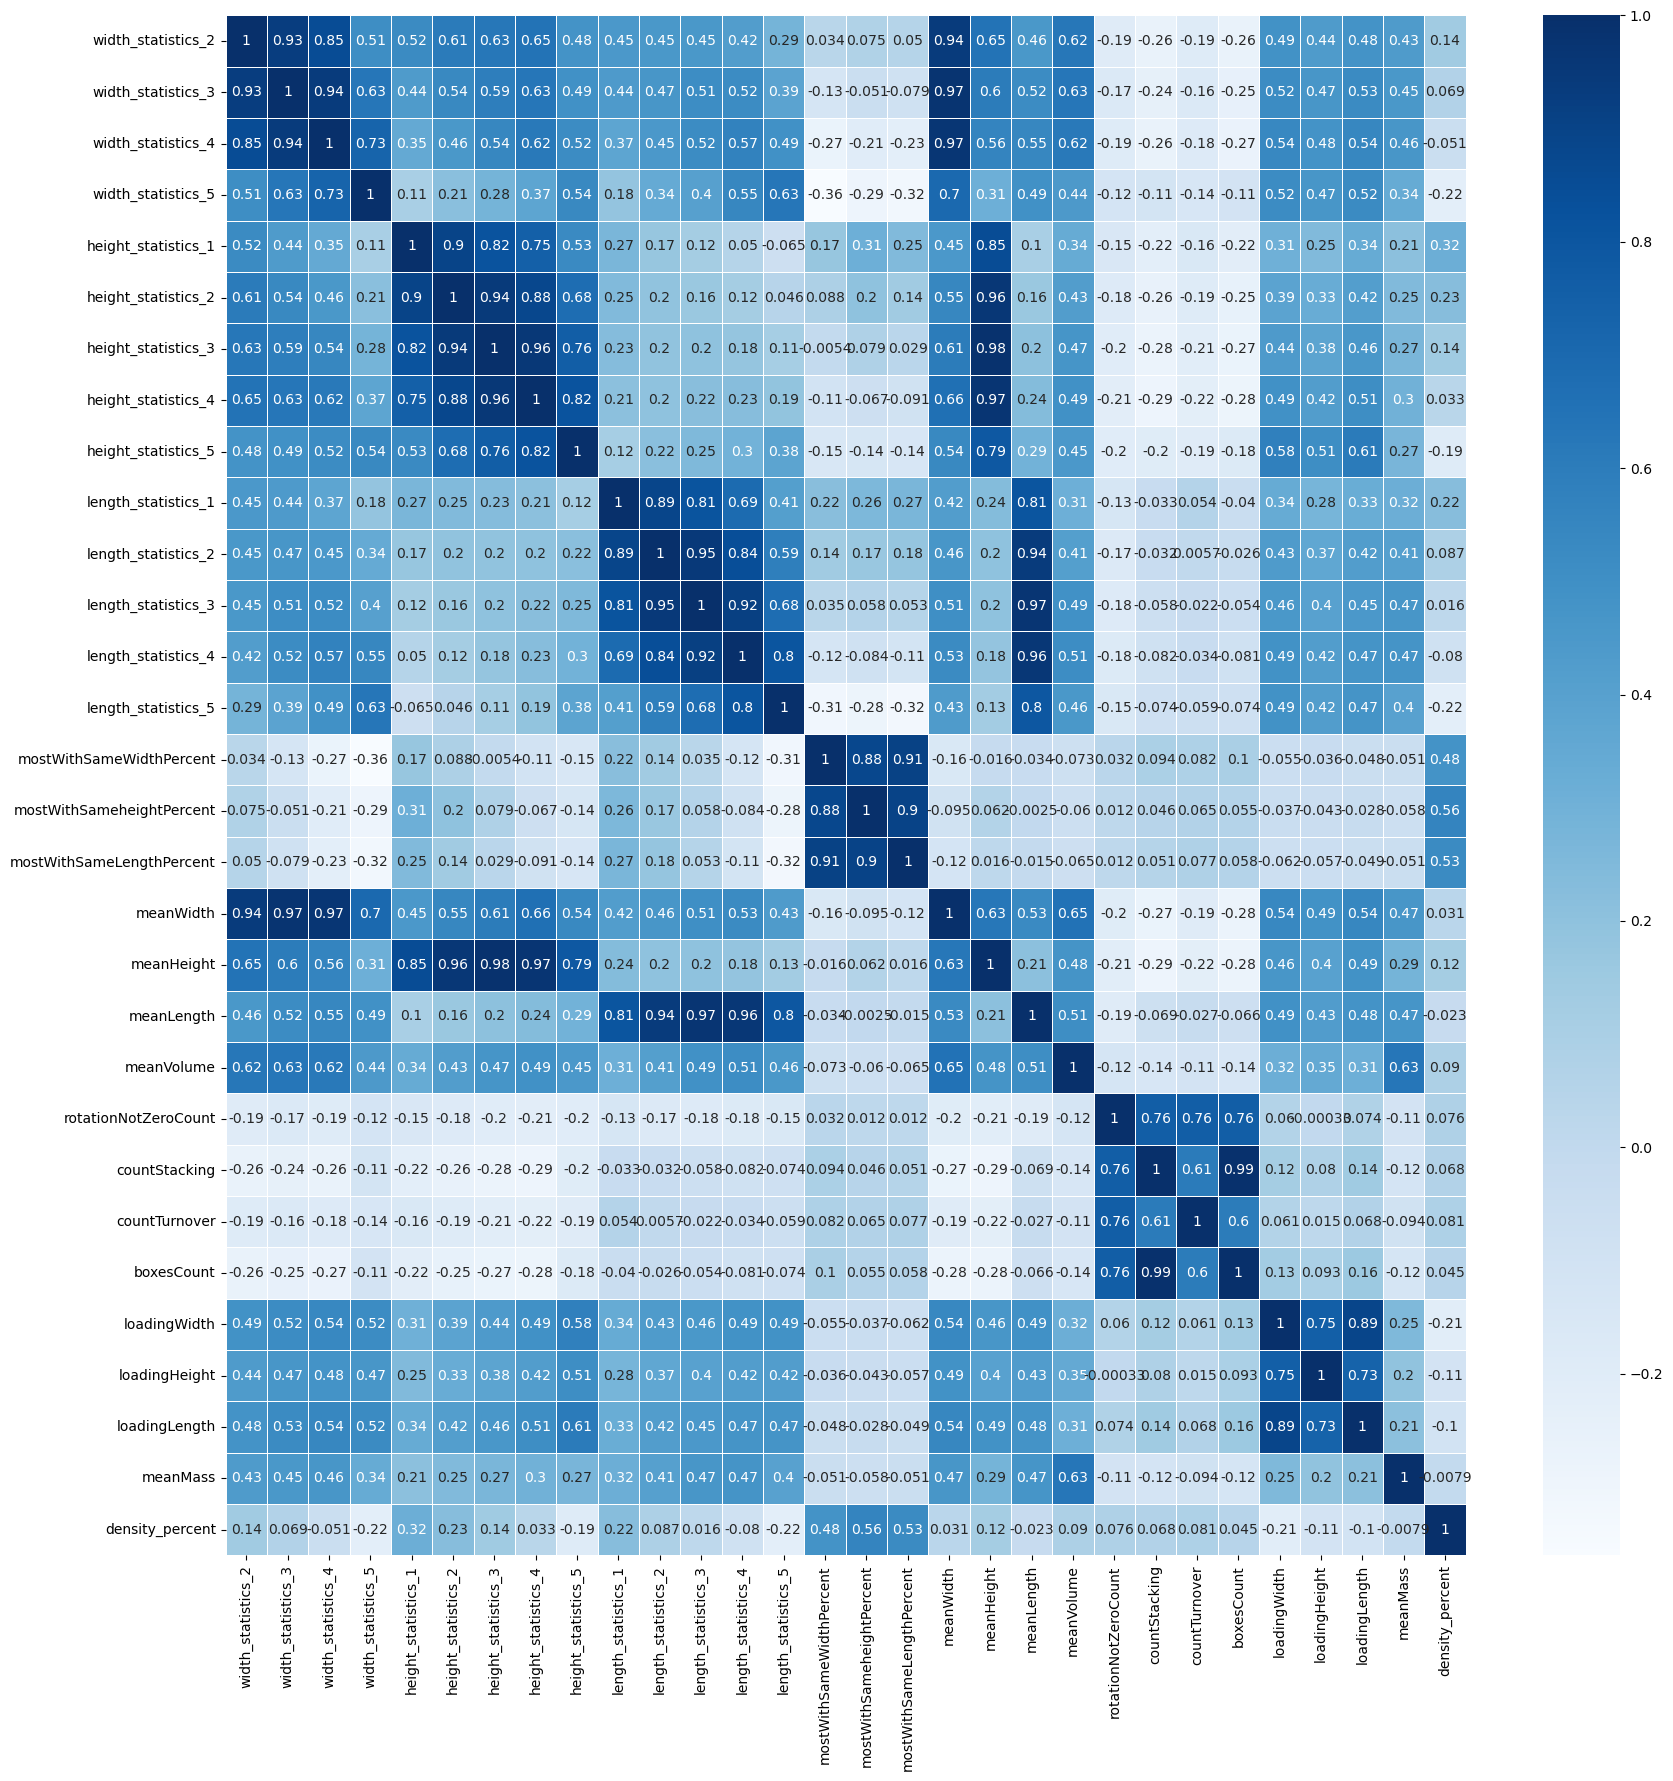

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(data[['width_statistics_1', 'width_statistics_2', 'width_statistics_3', 'width_statistics_4', 'width_statistics_5',
           'height_statistics_1', 'height_statistics_2', 'height_statistics_3', 'height_statistics_4', 'height_statistics_5',
           'length_statistics_1', 'length_statistics_2', 'length_statistics_3','length_statistics_4','length_statistics_5',
           'mostWithSameWidthPercent', 'mostWithSameheightPercent', 'mostWithSameLengthPercent',
           'meanWidth','meanHeight','meanLength','meanVolume',
           'rotationNotZeroCount', 'countStacking', 'countTurnover', 'boxesCount', 
           'loadingWidth', 'loadingHeight', 'loadingLength','meanMass', 'density_percent']].corr(), cmap='Blues', annot=True, linewidths=.5, ax=ax)
plt.show()

Неcложно заметить, что некоторые свойства являются коллинеарными. Также можно заметить, что данные о коробок с наименьшими и наибольшими габаритами больше всего влияют на density_percent.

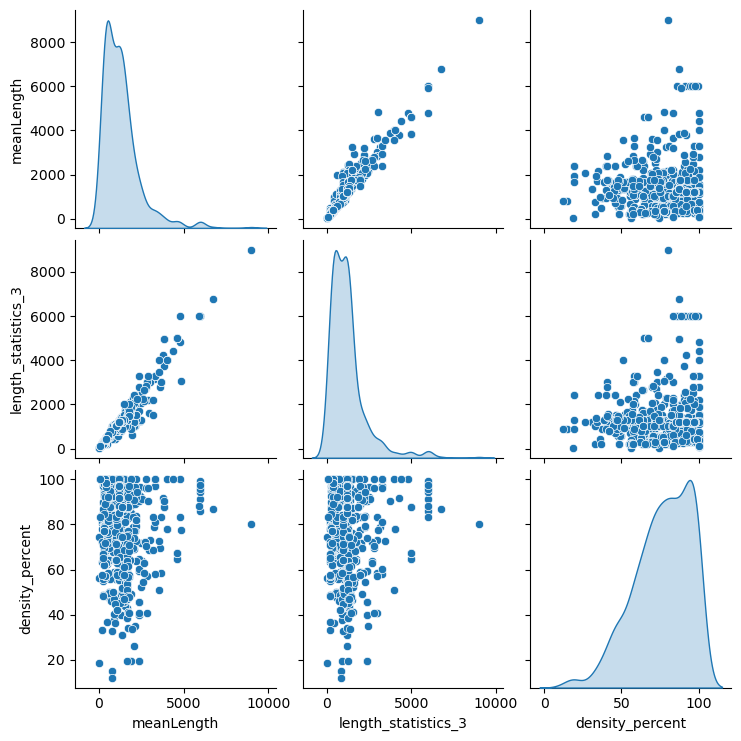

In [104]:
import seaborn as sns

sns.pairplot(data=data[["meanLength", "length_statistics_3", "density_percent"]], diag_kind='kde')

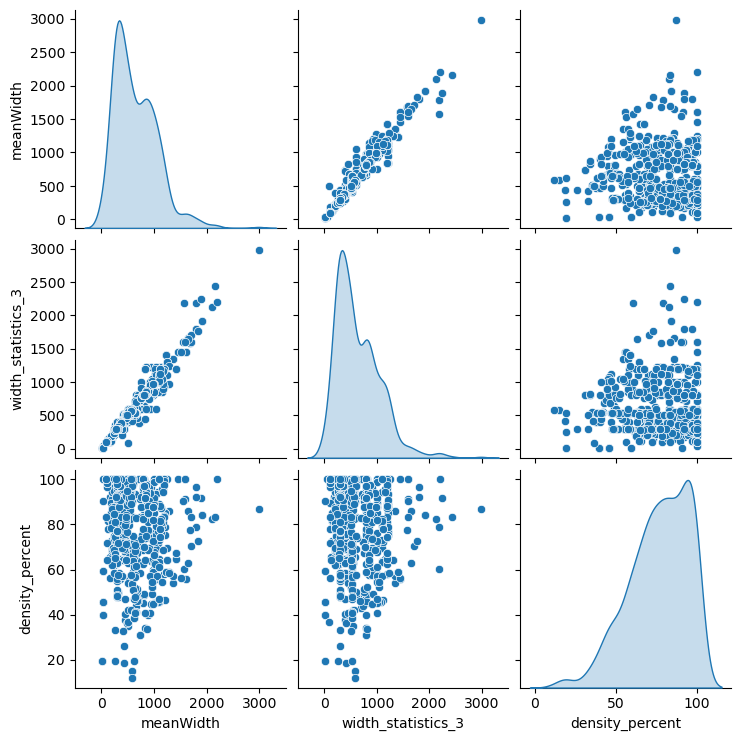

In [20]:
sns.pairplot(data=data[["meanWidth", "width_statistics_3", "density_percent"]], diag_kind='kde')

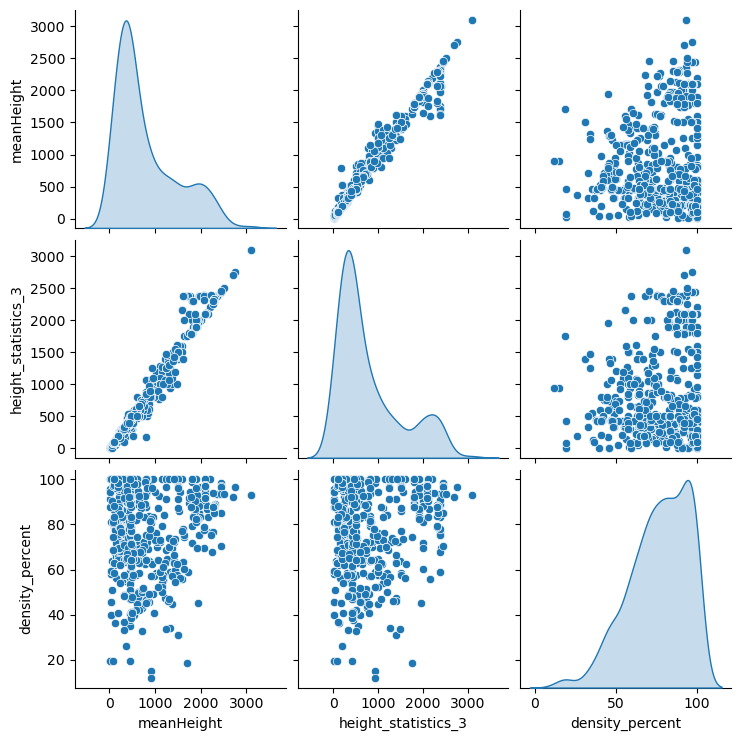

In [24]:
sns.pairplot(data=data[["meanHeight", "height_statistics_3", "density_percent"]], diag_kind='kde')

По графикам выше можно заметить, что такие свойства как meanWidth и width_statistics_3 коллинеарны. 

Такие свойства ухудшают работу модели, так что давайте уберём следующие характеристики:

 "meanMass",  'height_statistics_3', 'length_statistics_3', 'width_statistics_3',

In [106]:
new_features_2 = ['width_statistics_1', 'width_statistics_2', 'width_statistics_4', 'width_statistics_5',
           'height_statistics_1', 'height_statistics_2',  'height_statistics_4', 'height_statistics_5',
           'length_statistics_1', 'length_statistics_2', 'length_statistics_4','length_statistics_5',
           'mostWithSameWidthPercent', 'mostWithSameheightPercent', 'mostWithSameLengthPercent',
           'meanHeight','meanLength','meanVolume', "meanWidth",
           'rotationNotZeroCount', 'countStacking', 'countTurnover', 'boxesCount', 
           'loadingWidth', 'loadingHeight', 'loadingLength']

In [107]:
new_model_2 = LinearRegression(fit_intercept=True)  # объявляем модель
new_model_2.fit(train[new_features_2], train[target_feature])  # обучаем
new_model_2.score(test[new_features_2], test[target_feature])

0.4642839580416459

In [108]:
new_test_preds_2 = new_model_2.predict(test[new_features_2])
print('\nMSE =', round(np.sqrt(((test[target_feature] - new_test_preds_2) ** 2).mean()), 2))
print('MAPE =', round(mean_absolute_percentage_error(test[target_feature], new_test_preds_2), 2))


MSE = 12.69
MAPE = 14.97


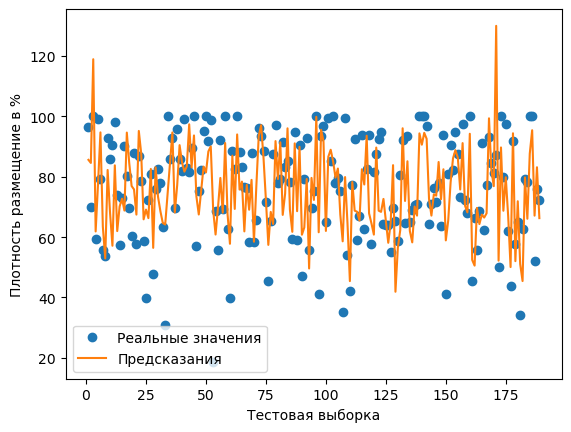

In [109]:
plt.plot(list(range(1, 190)), test[target_feature], 'o', label="Реальные значения")
plt.plot(list(range(1, 190)), new_test_preds_2, label="Предсказания")
plt.legend(loc="lower left")
plt.ylabel("Плотность размещение в %")
plt.xlabel("Тестовая выборка")
plt.show()